In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
from PIL import ImageFilter
import matplotlib.pyplot as plt

import os
import sys
from pathlib import Path

from libtiff import TIFF

Generating '/home/dhw3172/anaconda3/envs/pyAudio36/lib/python3.7/site-packages/libtiff/tiff_h_4_0_10.py' from '/home/dhw3172/anaconda3/envs/pyAudio36/lib/../include/tiff.h'


# Path to image

In [6]:
#prjDir = "/home/charles/Projects/gradientvectorfield"
prjDir = "/home/dhw3172/projects/gradientVectorField"
sys.path.append( Path() / "Python" )

In [7]:
#Fuck you motherfucker
FIG_DIR= Path(prjDir)  / "Figures"
DATA_DIR= Path(prjDir)  / "Data" / "Raster"

In [8]:
pathQcRaster=os.path.join( DATA_DIR, 'qcCroppedNeigh.tif')

# Raster tests

In [11]:
rasterQc=plt.imread(pathQcRaster) 
print(rasterQc.shape)
rasterQc

(1409, 2206, 4)


array([[[ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        ...,
        [  3,   3,   3, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       [[ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        ...,
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       [[ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        [ 20,  20,  20, 255],
        ...,
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       ...,

       [[ 27,  27,  27, 255],
        [ 27,  27,  27, 255],
        [ 27,  27,  27, 255],
        ...,
        [  6,   6,   6, 255],
        [  7,   7,   7, 255],
        [  7,   7,   7, 255]],

       [[ 27,  27,  27, 255],
        [ 27,  27,  27, 255],
        [ 27,  27,  27, 255],
        ...,
        [  6,   6,   6, 255],
        [  7,   7,   7, 255],
        [  8,   8,   8, 255]],

       [[ 27

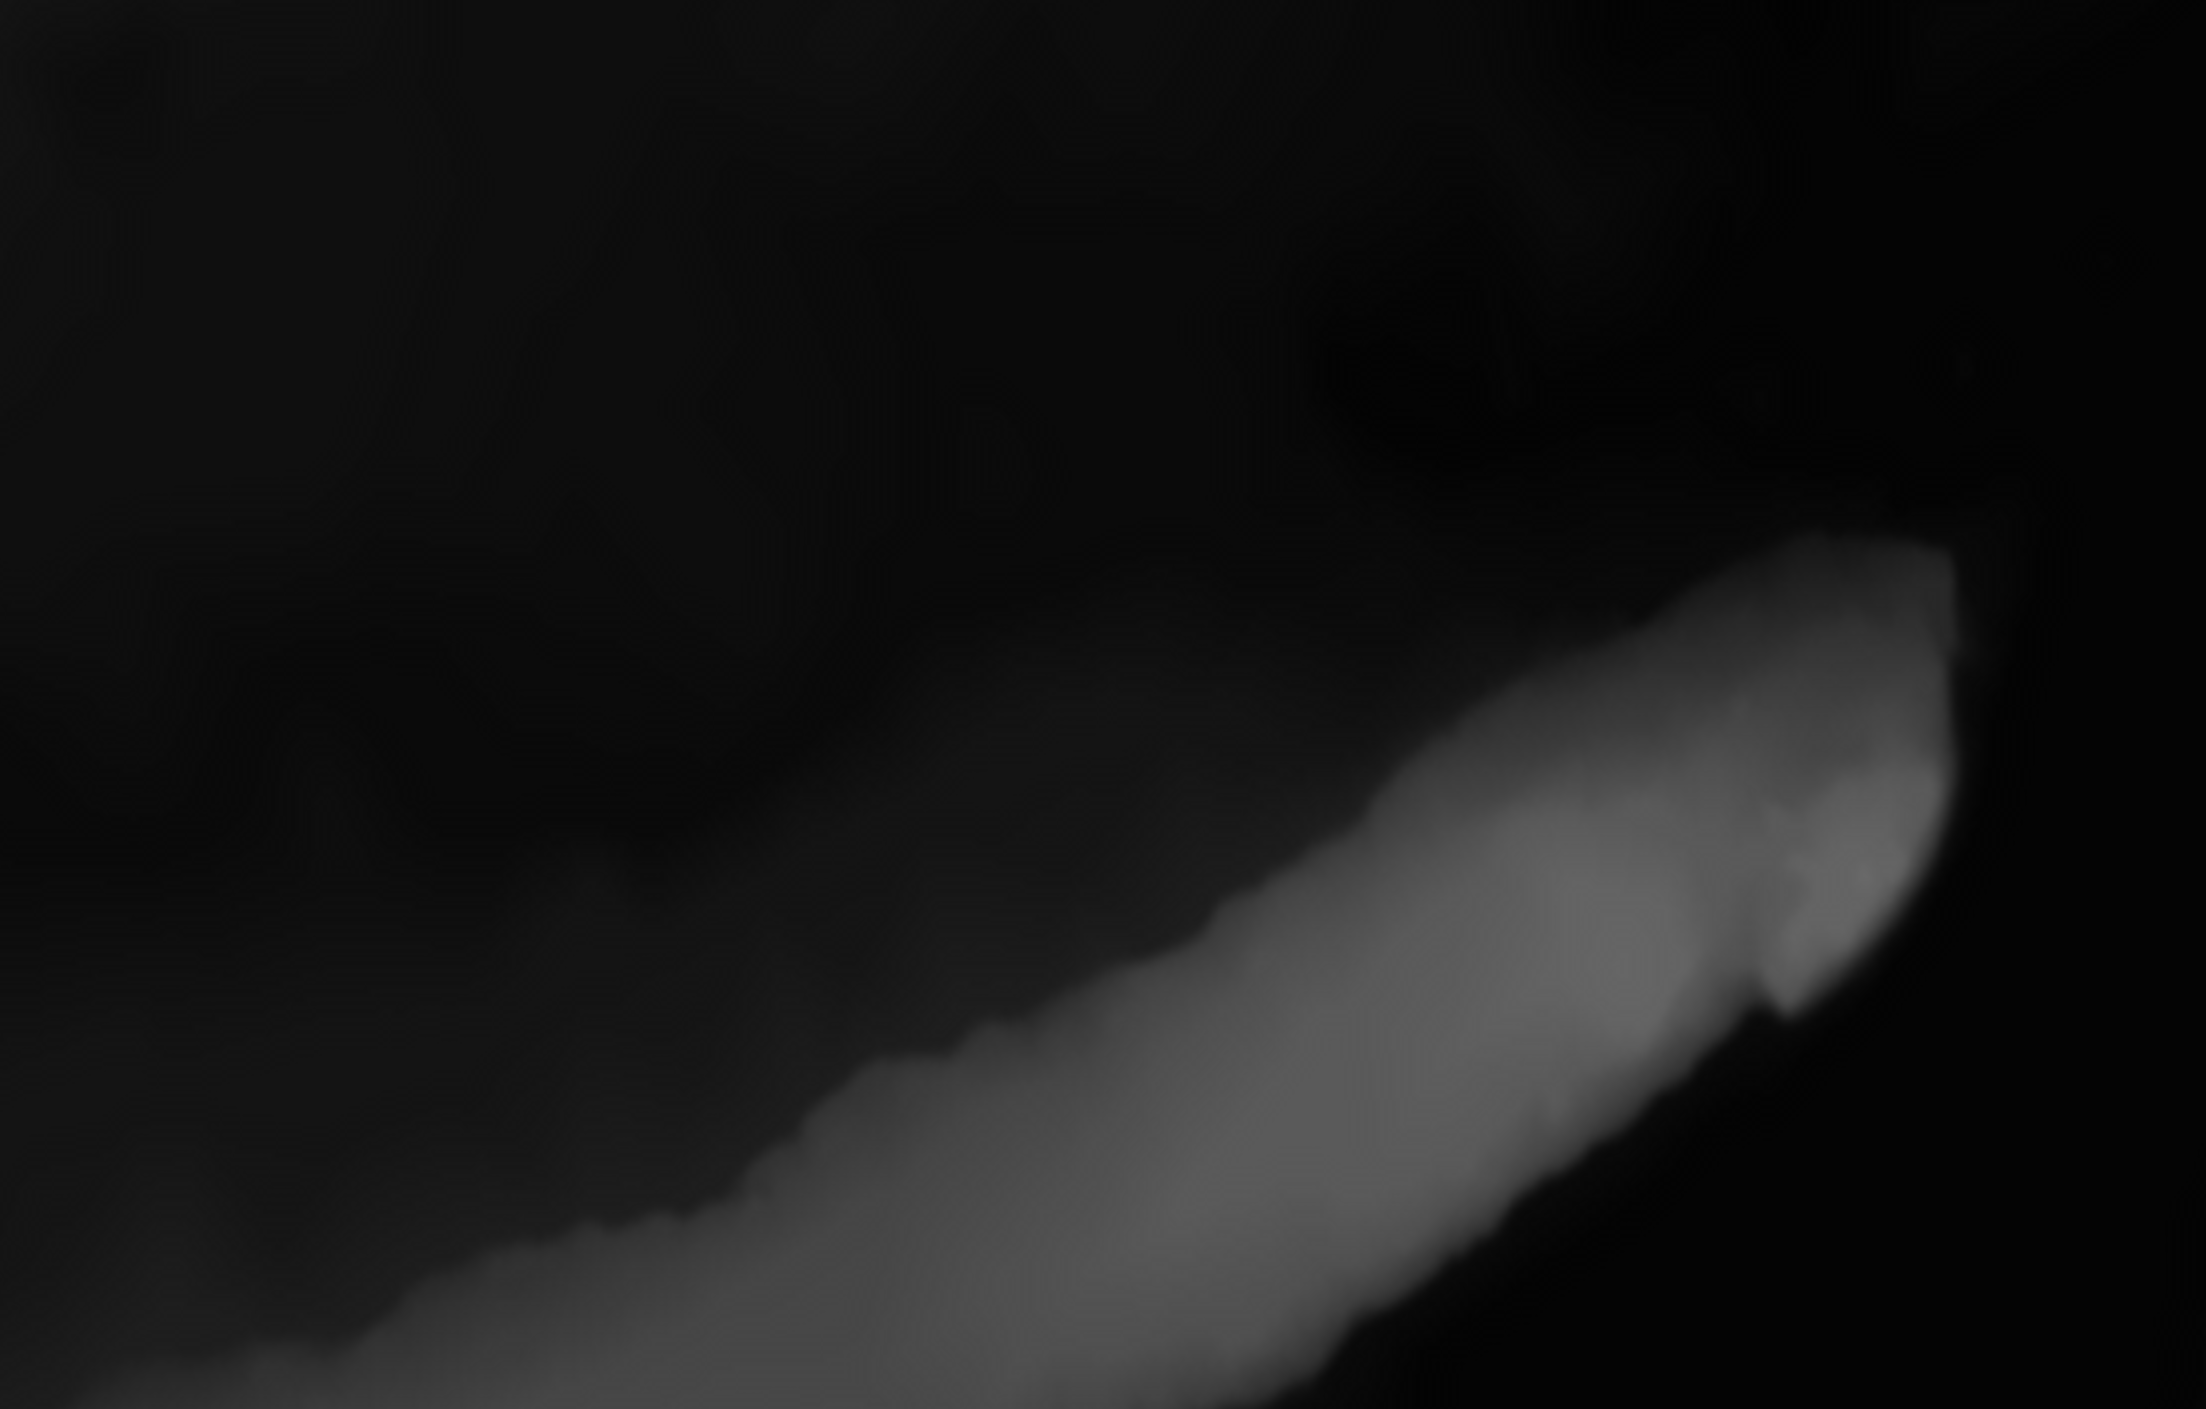

In [10]:
Image.fromarray(rasterQc)

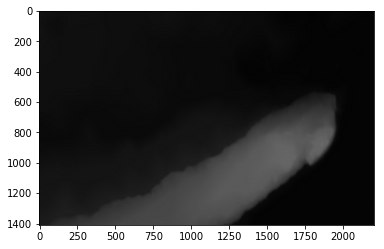

In [20]:
plt.imshow(rasterQc)

In [17]:
tif = TIFF.open(pathQcRaster) 
rasterQc2=tif.read_image()
rasterQc2

array([[20.009659 , 20.01324  , 20.008947 , ...,  3.9999998,  4.       ,
         4.       ],
       [20.006891 , 20.011503 , 20.009108 , ...,  4.       ,  4.       ,
         4.       ],
       [20.006493 , 20.01044  , 20.008392 , ...,  4.       ,  4.       ,
         4.       ],
       ...,
       [27.992437 , 27.992596 , 27.992437 , ...,  6.6875   ,  7.1294765,
         7.7805214],
       [27.953194 , 27.953882 , 27.948992 , ...,  6.9602556,  7.470605 ,
         8.183902 ],
       [27.919275 , 27.923252 , 27.91688  , ...,  7.369671 ,  7.9587016,
         8.742342 ]], dtype=float32)

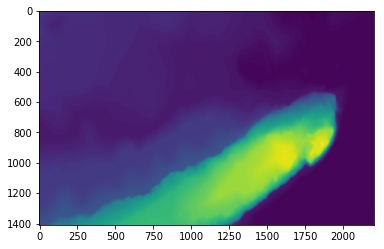

In [44]:
qcImg=plt.imshow(rasterQc2) 
qcImg

In [45]:
pathQcImage=os.path.join( FIG_DIR, 'qcCroppedNeigh.png')
qcImg.figure.savefig(pathQcImage)

AttributeError: 'AxesImage' object has no attribute 'savefig'

# Now try the gradient

In [72]:

I = Image.open(pathQcImage)
I = I.filter(ImageFilter.BLUR)
p = np.asarray(I).astype('int8')
w,h = I.size
x, y = np.mgrid[0:h:500j, 0:w:500j]
print(p.shape)
print(x)
print(h)

(288, 432, 4)
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.57715431   0.57715431   0.57715431 ...   0.57715431   0.57715431
    0.57715431]
 [  1.15430862   1.15430862   1.15430862 ...   1.15430862   1.15430862
    1.15430862]
 ...
 [286.84569138 286.84569138 286.84569138 ... 286.84569138 286.84569138
  286.84569138]
 [287.42284569 287.42284569 287.42284569 ... 287.42284569 287.42284569
  287.42284569]
 [288.         288.         288.         ... 288.         288.
  288.        ]]
288


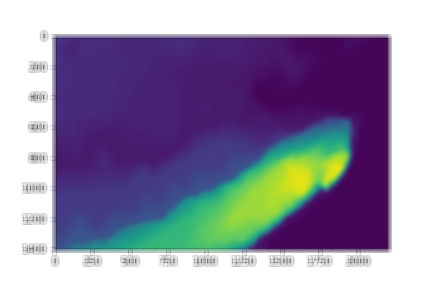

In [73]:
I

In [74]:
len( np.gradient(p) )

3

In [75]:
dy, dx, dz= np.gradient(p)
skip = (slice(None, None, 3), slice(None, None, 3))

ValueError: too many values to unpack (expected 2)

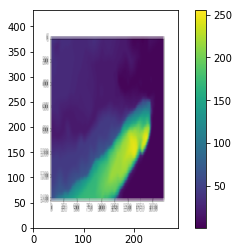

In [76]:

fig, ax = plt.subplots()
im = ax.imshow(I,
               #I.transpose(Image.FLIP_TOP_BOTTOM), 
               extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar(im)
ax.quiver(x[skip], y[skip], dx[skip].T, dy[skip].T)

ax.set(aspect=1, title='Quiver Plot')
plt.show()


In [77]:
 dx.shape

(288, 432, 4)

ValueError: too many values to unpack (expected 2)

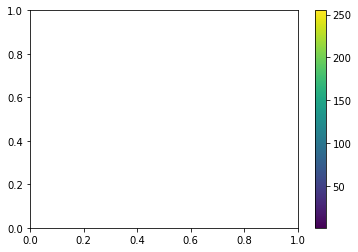

In [78]:
fig, ax = plt.subplots()

plt.colorbar(im)
ax.quiver( [x[skip], y[skip]], dx[skip].T, dy[skip].T)